In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [5]:
def plot_cost(hist):
    plt.plot(range(0, len(hist)), hist, label='Cost Function')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function')
    plt.title('Cost Function vs. Number of Iterations')

    plt.legend()

    plt.show()

def plot_model(x, y, X, model_w, model_b):
    plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
    plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()  

In [6]:
def y_hat(Xi, w, b):
    z = np.dot(Xi, w) + b
    return 1/(1+np.exp(-z))

In [7]:
def cost(X, y, w, b):
    m = len(X)
    return sum((y[i] * -np.log(y_hat(X[i], w, b))) + (1 - y[i]) * -np.log(1 - y_hat(X[i], w, b)) for i in range(m))/m

In [8]:
def get_partials(X, y, w, b):
    m, n = np.shape(X)
    dw = np.zeros(n)
    for j in range(n):
        Xj = X[:,j]
        dw[j] = sum([(y_hat(X[i], w, b) - y[i]) * Xj[i] for i in range(m)])/m
    db = sum([(y_hat(X[i], w, b) - y[i]) for i in range(m)])/m
    return dw, db

In [15]:
def gradient_descent(X, y, w, b, iter, alpha):
    m, n = np.shape(X)
    hist = np.array([])
    for i in range(iter):
        dw, db = get_partials(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db

        c = cost(X, y, w, b)
        if i<100000:      # prevent resource exhaustion 
            hist = np.append(hist, c)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% round(iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {c}   ")
        
    return w, b, hist

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837
10000


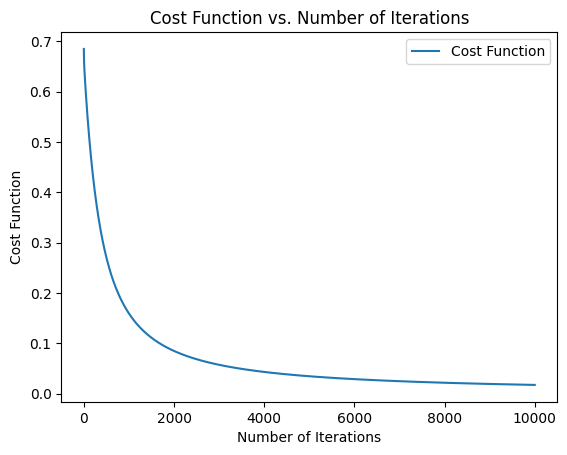

In [16]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, hist = gradient_descent(X_train, y_train, w_tmp, b_tmp, iters, alph) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")
plot_cost(hist)
